# **Calculus 1 - Derivatives**

The name is opaque. What is Calculus? Why is it always held up as a pinnacle of late high school maths? Probably because it is the first place where the more formal maths taught at university enters at school level. 

Simply put, calculus is all about the *rate of change* of functions. Speed is the rate of change of distance (e.g. 60 miles per hour), and acceleration is the rate of change of speed (0 to 60mph in 6 seconds, acceleration is 10mph per second).  

The rate of change of a function is called the *'derivative'* of the function. The act of calculating the rate of change you might also hear called *'taking the derivative'* of a function, or *'differentiating'* a function. 

# **Derivatives**

The rate of change of a function is related to the *gradient* of a function, but what we're interested in here is the *gradient at a single point*. What does this even mean? How can you have a gradient at a single point, when it's clear you need two points (x1, y1) and (x2, y2) to define a gradient as m = (y2-y1)/(x2-x2)?

In [125]:
(x1,y1) = (1., 5.)
(x2,y2) = (2., 10.)
m = (y2-y1)/(x2-x1)
m

//Board demo, gradient of quadratic function f(x) = x^2, then m = ( f(x+Delta) - f(x) )/( (x+Delta) - x )

So, the derivative can be thought of as the gradient of the function *in the limit* that the two points defining the gradient lie on top of each other. Let's take a brief diversion to examine the concept of a limit in more detail.

# **Diversion - Limits of functions**

In [126]:
from sympy import Symbol, Limit, init_printing, plot
init_printing()

The function f(x) = 1/x makes a great candidate to think about limits. It's clear that weird things happen to this function at x = 0, and x = +/- oo. 

In [127]:
x = Symbol('x')
f = 1/x
f

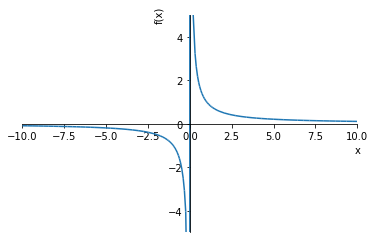

In [128]:
# Plot the function, but turn on y limits so we can see the behaviour close to x = 0
plot(f,ylim=[-5, 5])

In [129]:
# Let's take the limit as x is positive and gets larger and larger in magnitude towards +oo
from sympy import oo
limit_big_x_pos = Limit(f, x, oo)
limit_big_x_pos

In [130]:
# This is standard nomeclature. lim indicates were taking the limit of the function,
# subject to the condition written below the lim
# Now we need to take the limit, i.e. get SymPy to evaluate it.
limit_big_x_pos.doit()

In [131]:
# Now x is negative and gets larger and larger in magnitude towards -oo
limit_big_x_neg = Limit(f, x, -oo)
limit_big_x_neg

In [132]:
limit_big_x_neg.doit()

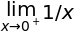

In [133]:
# Now for the weird behaviour at x = 0. It's clear that the function experiences a singularity here,
# but it seems to 'blow up' in opposite directions depending on whether x is positive or negative.
# This is a real effect, there's no avoiding it, so we need to have the idea of taking a limit 'in a direction'
# In this case, does x tend to zero from above (+ direction), or from below (- direction)?
limit_small_x_from_above = Limit(f, x, 0, dir='+')
limit_small_x_from_above

In [134]:
# Note the + sign on the 0
limit_small_x_from_above.doit()

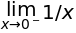

In [135]:
limit_small_x_from_below = Limit(f, x, 0, dir='-')
limit_small_x_from_below

In [136]:
# Now note the - sign on the 0
limit_small_x_from_below.doit()

Note the difference with the following function


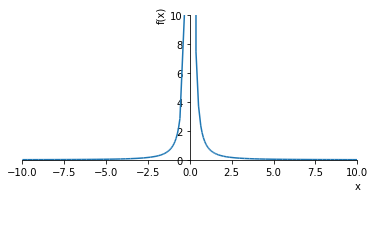

In [137]:
g = 1/x**2
plot(g,ylim=[-5, 10])

In [138]:
g_limit_small_x_above = Limit(g, x, 0, dir='+')

In [139]:
g_limit_small_x_above.doit()

In [140]:
g_limit_small_x_below = Limit(g, x, 0, dir='-')

In [141]:
g_limit_small_x_below.doit()

**Definition of e**

In [142]:
n = Symbol('n')
series = (1 + (1/n))**n
Limit(series, n, oo).doit()

**Funky variations**

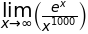

In [143]:
# Which 'wins', an exponential or a polynomial?
from sympy import exp
interesting_limit = Limit(exp(x)/x**1000, x, oo)
interesting_limit

In [144]:
interesting_limit.doit()

In [145]:
# Which 'wins', an exponential or a factorial?
# Factorial x! = x*(x-1)*(x-2)*...*2*1
from sympy import factorial
interesting_limit = Limit(exp(x)/factorial(x), x, oo)

In [146]:
interesting_limit.doit()

In [147]:
from sympy import sin
# Limit of an indeterminate form
f = sin(x)/x
interesting_limit = Limit(f, x, 0)

In [148]:
interesting_limit.doit()

**Limit of a Sequence**


A *sequence* is a list of numbers generated by some sort of algebraic rule. The sequence can be finite:

In [149]:
f = 1/n
a_n = [f.subs({n: i}) for i in range(0,10)]
a_n

or it can be infinite. We can think about the limit of a sequence, this is basically equivalent to thinking about taking the limit of the generating function under the same conditions, e.g.

In [150]:
Limit(f, n, oo).doit()

**Limit of a Series**

Things get more interesting when we think about the limit of a *series*. A series is defined as the summation of a sequence, e.g.

In [151]:
from sympy import summation
a_n = 1/n
# Play around with this sum for increasing upper limit of n - do you think the series approaches a finite limit? 
# // Introduce convergence and divergence
finite_series = summation(a_n,(n, 1, 10000)).n()
finite_series

In [152]:
# Nope, it diverges to infinity 
infinite_series = summation(a_n, (n, 1, oo))
infinite_series

In [153]:
# But this one converges
b_n = 1/n**2
summation(b_n, (n, 1, oo))

In [154]:
c_n = 1/2**n
# Again, try varying upper limit here
summation(c_n, (n, 0, 1000)).n()

In [155]:
# This infinite series also converges
summation(c_n, (n, 0, oo))

# **Back to Derivatives**

Now we've very briefly discussed limits, we're much better placed to think about differentiation. In particular, we can envisage the derivative of a function as the gradient of the function *in the limit that the two points defining the gradient come together in a single point*!

In [156]:
# Here is our function to be differentiated
f_x = x**2
# Delta here stands for a difference in x
Delta = Symbol('Delta')
# The function evaluated at x+Delta
f_x_plus_delta = f_x.subs({x: x + Delta})
gradient = (f_x_plus_delta - f_x) / (x + Delta - x)
gradient

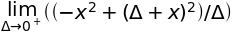

In [157]:
# The two points are separated by Delta. If we take the limit as Delta -> 0, we get the 'instantaneous' gradient
# at a single point, AKA the derivative!
derivative = Limit(gradient, Delta, 0)
derivative

In [158]:
derivative.doit()

// This is key, stop for a while and show this derivation on the board.

In [159]:
# Let's try this again for x**3
f_x = x**3
f_x_plus_delta = f_x.subs({x: x + Delta})
gradient = (f_x_plus_delta - f_x) / (x + Delta - x)
derivative = Limit(gradient, Delta, 0)
derivative.doit()

// Again, show this derivation on the board - Pascal's Triangle for binomial coefficients, or full expansion if people would like more concrete proof

// Get people to try the same analysis with a line y = 4x - 2, either pen and paper or sympy.
// Before they begin, what do they think the answer should be?

In [160]:
f_x = 4*x-2
f_x_plus_delta = f_x.subs({x: x + Delta})
gradient = (f_x_plus_delta - f_x) / (x + Delta - x)
derivative = Limit(gradient, Delta, 0)
derivative.doit()

The derivative of a function if often denoted as dy/dx, or df_x/dx, or (d/dx)f_x, or f'(x), or Df_x<br>
What we have done a few times above is recreate the formal calculation of the derivative as the limit of a gradient. SymPy offers up the Derivative() class to make this easier.

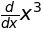

In [161]:
from sympy import Derivative
f_x = x**3
derivative = Derivative(f_x, x, 1)
# Syntax: Derivative(a, b, c), a = function to be differentiated, b = variable to differentiate w.r.t., c = order of derivative
# Here, we'll just worry about first-order derivatives
derivative

In [162]:
derivative.doit()

**Some might think this is inherently great, but others might say "Big whoop, so what?"** <br>
Calculus is pretty much fundamental to the whole of applied mathematics: physics, data science and economics all rely heavily on it

For derivatives, the key is to realise that the x-values where the derivative f'(x) vanish, i.e. the roots of the derivative (solving f'(x) = 0), correspond to stationary points of the original function f(x). Amongst these will be points where the function is maximised or minimised. So, by finding the roots of derivatives, we can solve important problems.

// Talk through this on board. Derivative as gradient, vanishes at a turning point, horizontal tangent, f(x) = x^2, f'(x) = 2x

**Farmer Brown's Paddock**

Let's try a classic calculus problem. Imagine Farmer Brown is building a *rectangular* paddock for his horses. He has 500m of wire, and wants to know how long to make the x and y sides of the paddock so as to *maximise* the area of the paddock. Maximisation and minimisation (or, more generally, *optimisation*) fall within the realm of calculus. 

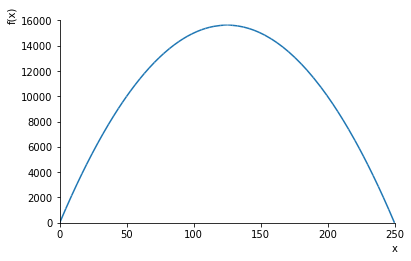

In [163]:
from sympy import symbols, Eq, solve
# A = area, P = perimeter, x = x-side length, y = y-side length
A, P, x, y = symbols('A, P, x, y')
# two x-sides, two y-sides, perimeter is sum
P = 2*x + 2*y
# area of rectangle is x*y
A = x*y
# set perimeter equal to 500
P_eq = Eq(P, 500)
# solve P_eq for y
y_soln = solve(P_eq, y)[0]
# substitute this into A so A now only involves x
A_x = A.subs({y: y_soln})
plot(A_x,(x, 0, 250))

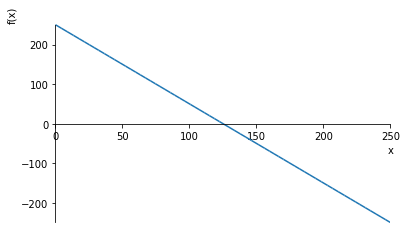

In [164]:
# Now let's differentiate A_x
A_x_diff = Derivative(A_x, x, 1).doit()
plot(A_x_diff, (x, 0, 250))

In [165]:
# Now get the position of the maximum turning point, i.e. the root of A_x_diff
x_max = solve(A_x_diff, x)[0]
x_max

In [166]:
# What is y_max
y_max = y_soln.subs({x: x_max})
y_max

So the shape maximising the area turns out to be a square with sides of length 125m. Here, visual inspection shows that this choice of x maximises the area, but what would we do if we needed to prove this?

**Second Derivative**

We would calculate the second derivative, AKA the derivative of the derivative. The gradient of the gradient is called the *curvature* of the function. If this is positive at a stationary point, the point is a *minimum*; if it is negative, a *maximum*; and if it is zero, we have a *point of inflexion*. 

In [167]:
A_x_diff2 = Derivative(A_x_diff, x, 1).doit()

In [168]:
A_x_diff2.subs({x: x_max})

So we have a maximum

In [169]:
# Could also do this in one step by setting the order of derivative to 2 
A_x_diff2 = Derivative(A_x, x, 2).doit()
A_x_diff2.subs({x: x_max})

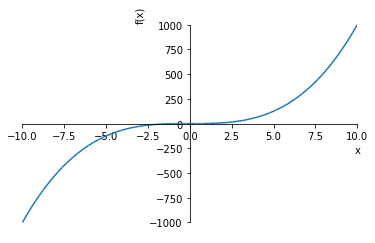

In [170]:
# Classic point of inflexion
f = x**3
plot(f)

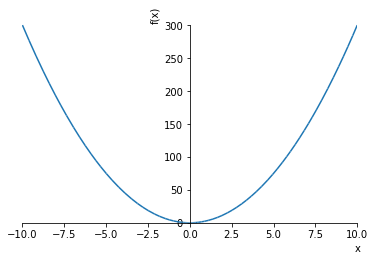

In [171]:
df_dx = Derivative(f, x, 1).doit()
plot(df_dx)

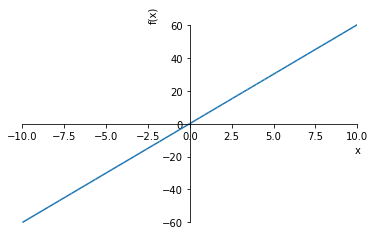

In [172]:
d2f_dx2 = Derivative(f, x, 2).doit()
plot(d2f_dx2)

So we see that the curvature is zero at the stationary point.

# **Numerical Derivatives**

Often we want to use numerical approximations to the derivative - e.g. when we have only data but no underlying function, or we have a function that cannot be differentiated <br>
The simplest approximation for a numerical derivative is to calculate a gradient at two very closely spaced points, mimicking the derivation of the formal derivative above 

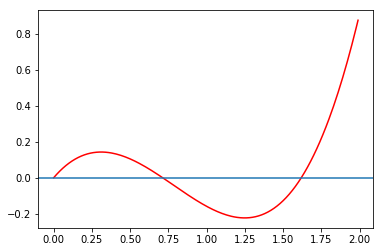

In [173]:
import numpy as np
import matplotlib.pyplot as plt
f_x = lambda x: x**3 - 2*x**2 + np.sin(x)
x = np.arange(0, 2, 0.01)
plt.plot(x, f_x(x), 'r')
plt.axhline(y=0)

In [174]:
# if we have the underlying function, we could do something like this
# we retain control over the step size delta used to calculate the gradient
# this algorithm is called 'forward differences' as we use the present point and a point 'ahead'
def derivative_using_f(f, x, delta=0.0001):
    deriv = (f(x+delta) - f(x)) / delta
    return deriv

In [175]:
deriv_x = derivative_using_f(f=f_x, x=x)

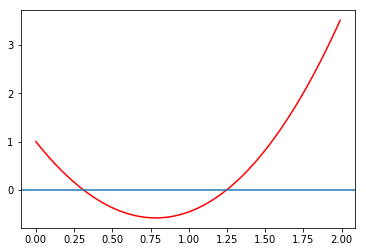

In [176]:
plt.plot(x, deriv_x, 'r')
plt.axhline(y=0)

In [177]:
# if we don't have the underlying function, we lose control over the step size
# we have to use f(x) at the x-values provided, we can't do any better
def derivative_without_f(y,x):
    return np.diff(y) / np.diff(x)        

In [178]:
worse_deriv = derivative_without_f(f_x(x),x)

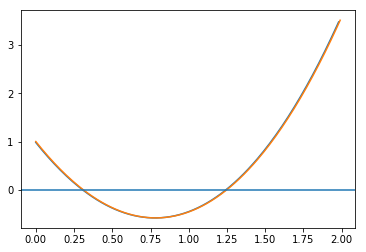

In [181]:
plt.plot(x[:-1], worse_deriv)
plt.plot(x, deriv_x)
plt.axhline(y=0)

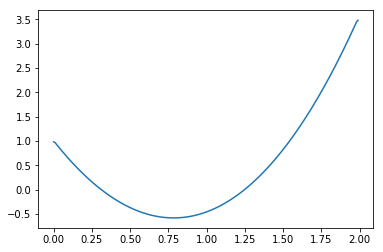

In [180]:
# Or use numpy gradient method
delta = x[1]-x[0]
deriv = np.gradient(f_x(x), delta)
plt.plot(x, deriv)